## Challenge 1: Methods


In [25]:
import pandas as pd
import numpy as np
penguins = pd.read_csv('penguins.csv')
penguins['species'].value_counts(ascending=True)
#Operating on a series
#Returns a series of counts for each unique value in the column

Chinstrap     68
Gentoo       124
Adelie       152
Name: species, dtype: int64

In [26]:
penguins.isnull()
#operates on the dataframe
#returns a dataframe with True where null items are

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
339,False,False,True,True,True,True,True
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


In [27]:
penguins.dropna()
#operates on the dataframe


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [28]:
penguins['species'].str[0]
#operates on a column
#returns first item of every string

0      A
1      A
2      A
3      A
4      A
      ..
339    G
340    G
341    G
342    G
343    G
Name: species, Length: 344, dtype: object

## Challenge 2: Finding the right method

Recall that in the penguins data set, there was one column that had two values 'MALE' and 'FEMALE'. Let's say that for a model, we want to replace the string values with numbers (FEMALE = 0; MALE = 1). Look at the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.html) and identify a method to *replace* the strings with their corresponding numbers. Then try to implement the method. What roadblocks do you run across?

In [31]:
penguins['sex_numeric'] = penguins['sex'].replace(['MALE','FEMALE'],[1,0])

2)  Notice that there are some 'NaN' values in the `Series`. You do some research and identify three possible solutions to deal with the NaN values (listed below). For each of the options, describe what will happen to NaN values in the column, and the DataFrame as a whole. Which option seems most appropriate? Modify that function as necessary. 

Consider the following:
- Is the whole DataFrame or just the column (Series) being operated on?
- What exactly are happening to the NaN values?
- What are the consequences, if any, for the solution in the hypothetical model? 
- Should removing null values happen before, during or after the conversion in (1)?

In [35]:
penguins['sex'].replace(['MALE','FEMALE',np.nan],[1,0,2])
#Replaces nulls with 2. Might have issues in the model (since 2 doesn't represent a third category)

0      1
1      0
2      0
3      2
4      0
      ..
339    2
340    0
341    1
342    0
343    1
Name: sex, Length: 344, dtype: object

In [38]:
penguins.fillna(2)

#Fill in all NAs in the dataset with 2. 
#This could work if you modify it to penguins['sex'].fillna(2), although it runs into the same issues as above.


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,sex_numeric
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,0
3,Adelie,Torgersen,2.0,2.0,2.0,2.0,2,2
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,0
...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,2.0,2.0,2.0,2.0,2,2
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,1
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,0


In [39]:
penguins.dropna(subset = 'sex')
#This drops all rows with NAN in the sex column. This is the most straightforward option.
#However, it reduces the amount of data in the dataset.


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,sex_numeric
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,1
...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE,0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,1
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,0


## Challenge 3: Subsetting a DataFrame
1. Modify the .loc[] expression above to subset for all Adelie penguins and save it to a variable `adelie`
2. Calculate the mean body mass for this species (**Hint**: use `.mean()`).
3. Repeat 1-2 for Gentoo and Chinstrap penguins.

In [40]:
adelie = penguins.loc[penguins['species']=='Adelie',:]
chinstrap = penguins.loc[penguins['species']=='Chinstrap',:]
gentoo = penguins.loc[penguins['species']=='Gentoo',:]

## Challenge 4: Customizing a Plot

One intuition may be that different penguin species have different culemtn length/depth, resulting in the pattern observed in the scatterplot above. Let's say we want to explore this pattern by plotting the data for each species in a different color. This will allow us to visualize this pattern if is present.

The way we implement this in plotting is by plotting individual layers for each species. Most visualizations treat images as "layers" on the backend. This allows us to create customizations to plots pretty easily, because each customization would be a new "layer".

So let's try it! Specifically, we want to visualize the culmen depth vs. the culmen length for each of the penguin species separately. We'll use different colors for each species.

To do this, we set the first layer equal to the variable `fig`. This represents our plot. All of our plots thus far have had a single layer. To include multiple layers in a plot, we simply include the argument `ax=fig` in any subsequent layers. This tells `pandas` to put new layers on the original plot rather than to make a new plot.

Follow the steps below to make your own layered visualization!

1. Make three different sub-DataFrames, one for each species, using `.loc[]` and a Boolean mask. (**Hint:** This is the solution to Challenge 3)
2. Plot the first layer and set it equal to `fig`.
3. Plot subsequent layers. Use a different color for each species (look at the documentation for the name of the color parameter). Some possible colors to use are `'green'`, `'red'`, `'purple'`, `'black'`, etc. (Remember to include the argument `ax=fig`!)
4. Do you notice a pattern in culmen measurements based on species? What other elements for the plot would be helpful for interpreting it?

**Bonus:** Add a title and any other modifications to the plot (better x and y labels, for example).

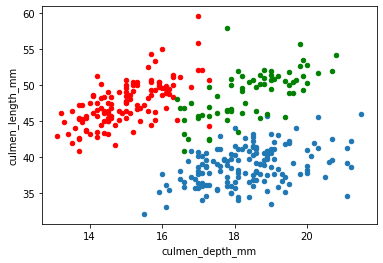

In [41]:
adelie = penguins.loc[penguins['species']=='Adelie',:]
chinstrap = penguins.loc[penguins['species']=='Chinstrap',:]
gentoo = penguins.loc[penguins['species']=='Gentoo',:]


ax = adelie.plot(x='culmen_depth_mm',y='culmen_length_mm',kind = 'scatter')
ax = gentoo.plot(x='culmen_depth_mm',y='culmen_length_mm',kind = 'scatter',color='red',ax=ax)
ax = chinstrap.plot(x='culmen_depth_mm',y='culmen_length_mm',kind = 'scatter',color='green',ax=ax)